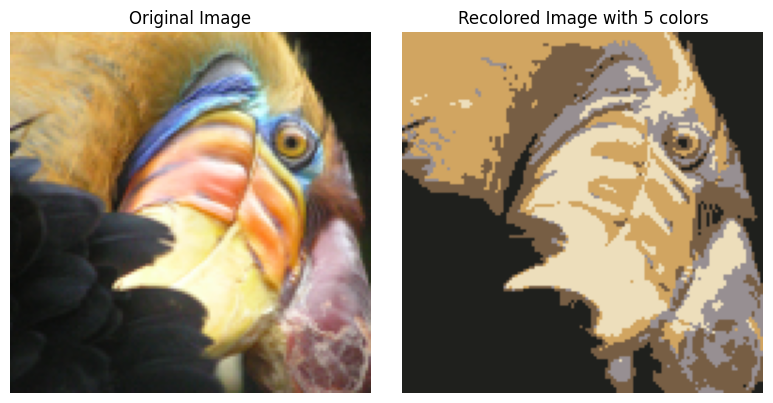

In [1]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 加载图像并转换为 numpy 数组
image = Image.open('../data/bird_small.png')
image_np = np.array(image)

# 将图像数据重塑为（num_pixels, num_channels）
pixels = image_np.reshape(-1, 3)

# 定义要使用的聚类数（即颜色数）
n_colors = 5

# 创建 KMeans 实例并拟合数据
kmeans = KMeans(n_clusters=n_colors, random_state=0)
kmeans.fit(pixels)

# 重新创建图像，使用聚类中心（颜色）
new_colors = kmeans.cluster_centers_[kmeans.labels_].astype(int)
new_image = new_colors.reshape(image_np.shape)

# 显示原始图像和重建图像
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(new_image)
ax[1].set_title('Recolored Image with {} colors'.format(n_colors))
ax[1].axis('off')

plt.tight_layout()
plt.show()

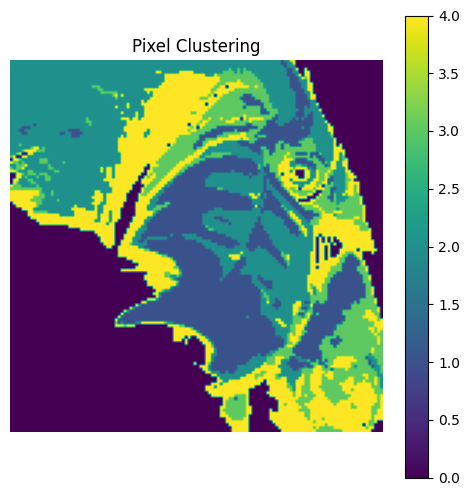

In [2]:
image = Image.open('../data/bird_small.png')
image_np = np.array(image)

# 将图像数据重塑为（num_pixels, num_channels）
pixels = image_np.reshape(-1, 3)

# 使用 k-means 聚类找到主要颜色
n_colors = 5
kmeans = KMeans(n_clusters=n_colors, random_state=0)
kmeans.fit(pixels)

# 获取聚类标签用于着色
labels = kmeans.labels_

# 将数据重塑回二维空间的像素网格
label_image = labels.reshape(128, 128)

# 创建一个图表来显示聚类结果
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='viridis')
plt.colorbar()
plt.title('Pixel Clustering')
plt.axis('off')  # 关闭坐标轴
plt.show()

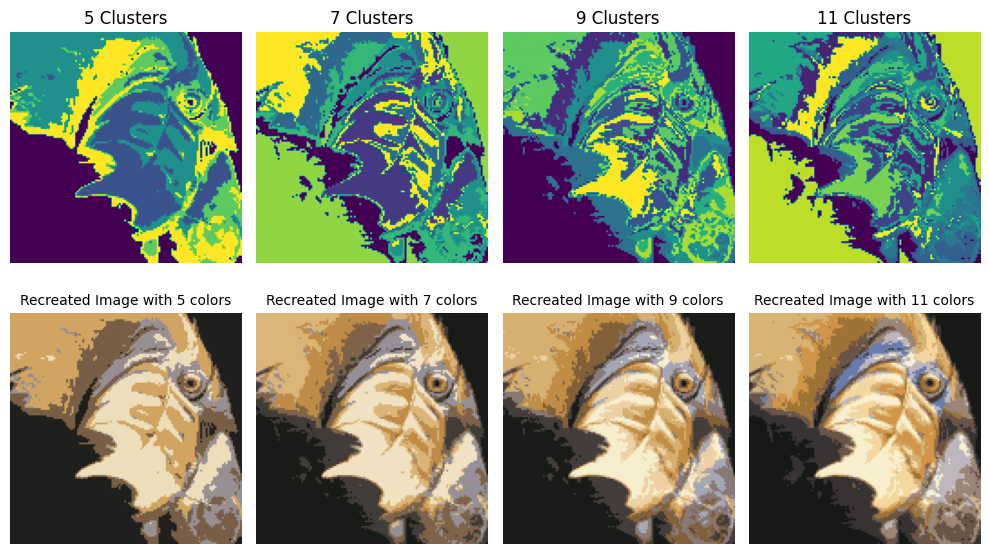

In [3]:
# 对不同数量的聚类中心进行聚类，并可视化结果
cluster_counts = [5, 7, 9, 11]  # 尝试不同的聚类数量
fig, axs = plt.subplots(2, len(cluster_counts), figsize=(10, 6))

for i, n_colors in enumerate(cluster_counts):
    # 使用 k-means 聚类找到主要颜色
    kmeans = KMeans(n_clusters=n_colors, random_state=0)
    kmeans.fit(pixels)

    # 获取聚类标签用于着色
    labels = kmeans.labels_

    # 将数据重塑回二维空间的像素网格
    label_image = labels.reshape(image_np.shape[0], image_np.shape[1])

    # Recreate the image using cluster centers
    recreated_image = kmeans.cluster_centers_[labels].reshape(image_np.shape).astype(np.uint8)

    # 显示聚类标签图像
    axs[0, i].imshow(label_image, cmap='viridis')
    axs[0, i].set_title(f'{n_colors} Clusters')
    axs[0, i].axis('off')

    # 显示重建的图像
    axs[1, i].imshow(recreated_image)
    axs[1, i].set_title(f'Recreated Image with {n_colors} colors', fontsize=10)
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()